**STEP 0: INITALIZE**

In [1]:
!pip install rdkit-pypi -qqq

import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools

**STEP 1: READ COMPOUNDS**

In [2]:
cpds = pd.read_csv("https://raw.githubusercontent.com/AJK-dev/course_materials/main/Ligand_based_machine_learning/data/EGFR_compounds_lipinski.csv", index_col=0)
PandasTools.AddMoleculeColumnToFrame(cpds, smilesCol='smiles', molCol='molecule')

**STEP 2: DEFINE SUBSTRUCTURE**

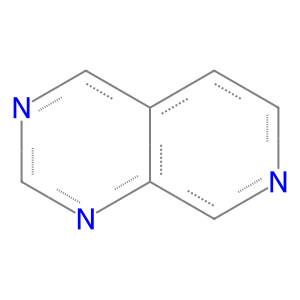

In [3]:
# Pyridopyrimidine
substructure = Chem.MolFromSmarts('c12cnccc1cncn2')
Draw.MolToImage(substructure)

**STEP 3: EXECUTE SUBSTRUCTURE SEARCH**

In [4]:
matches = []
for index, row in cpds.iterrows():
  if row["molecule"].HasSubstructMatch(substructure):
    row["molecule"].SetProp("_Name", row["molecule_chembl_id"])
    result = row["molecule"].GetSubstructMatches(substructure)
    matches.append([row["molecule"], [match for matchmol in result for match in matchmol]])

print("IDENTIFIED", len(matches), " MOLECULES!")

IDENTIFIED 109  MOLECULES!


**STEP 4: SHOW RESULTS FIRST HITS**

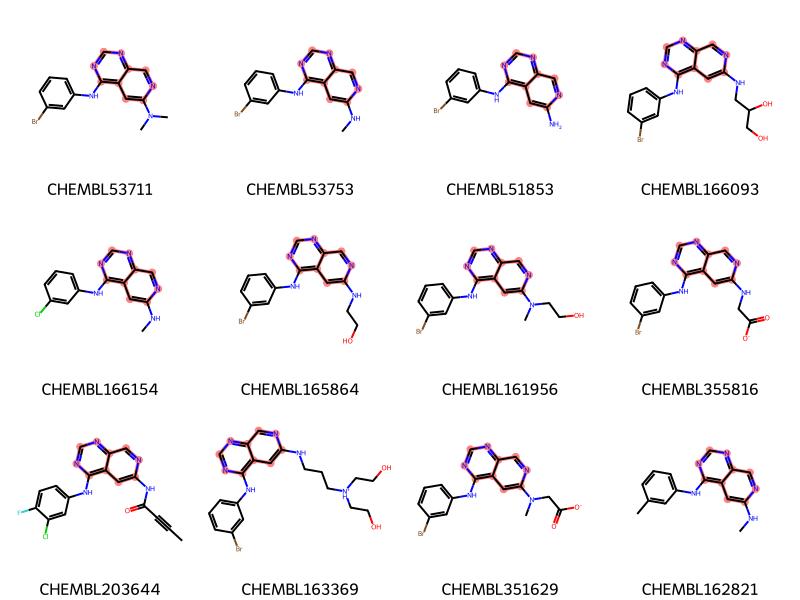

In [5]:
max_number = 12
selected_mols = [mol[0] for mol in matches[:max_number]]
selected_matches = [mol[1] for mol in matches[:max_number]]
Draw.MolsToGridImage(selected_mols, legends=[x.GetProp("_Name") for x in selected_mols], highlightAtomLists=selected_matches, molsPerRow=4)